<div style="text-align: center;">
    <h1 style="color: #3498db;">MMSR Project 2</h1>
    <h2 style="color: #3498db;">Audio based similarity retrieval</h2>
</div>

-------------------------------------------------------------

<b>Date:</b> 12.12.2023
    
| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. | Participation in % |
| ---------------------------------------------- | ---------------------------------------------- | -------- | ------------------- |
| <p style="text-align: left">Giulia</p>| <p style="text-align: left">Bianchi</p> | K11819746 | 33.3%                 |
| <p style="text-align: left">Said</p>| <p style="text-align: left">Khudoyan</p> | k12007356 | 33.3%                 |
| <p style="text-align: left">Razaghi</p>| <p style="text-align: left">Hikmatullah</p> | k11913261 | 0%                 |
| <p style="text-align: left">Robert</p>| <p style="text-align: left">Wagner</p> | K00475197 | 33.3%                |



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    In this notebook we are going to create 4 audio based retrieval systems, which are then afterwards going to be evaluated on a bunch of different metrics. However, we will also try to evaluate the previous  4 retrieval systems from Task 1.
    As a short sidenote, we implemented all necessary functions inside our helper utils file, so we can keep the notebook kind of structured.
</div>

<h1 style="color:rgb(0,120,170)">Data Loading</h1>

---------------------------------------------------------



<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 1: Necessary Imports and Data Loading</p>
    <p> First of all we import some packages we need to work with later on. We also load the provided datasets of the respective methods.
</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import warnings
import utils_helper as helper
warnings.filterwarnings('ignore')

In [2]:
# Load original data
info_df = pd.read_csv('ws23_exercise1/id_information_mmsr.tsv', sep='\t')
mfcc_stats_df = pd.read_csv('ws23_exercise2/task2/id_mfcc_stats_mmsr.tsv', sep='\t')
mfcc_bow_df = pd.read_csv('ws23_exercise2/task2/id_mfcc_bow_mmsr.tsv', sep='\t')
blf_df = pd.read_csv('ws23_exercise2/task2/id_blf_logfluc_mmsr.tsv', sep='\t')
ivec_df = pd.read_csv('ws23_exercise2/task2/id_ivec256_mmsr.tsv', sep='\t')
dnn_df = pd.read_csv('ws23_exercise2/task2/id_musicnn_mmsr.tsv', sep='\t')
genre_df = pd.read_csv('ws23_exercise2/task2/id_genres_mmsr.tsv', sep='\t')
full_dataset = pd.merge(info_df, genre_df, on='id')

<h1 style="color:rgb(0,120,170)">Retrieval Methods</h1>

---------------------------------------------------------

Next up we try to retrieve the songs using the 4 different methods

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 2: Define Query songs</p>
    <p> Next up we define our example query songs, which we are going to use throughout the whole notebook
</p>
</div>

In [3]:
# First we define some columns and example tracks for the methods
columns = ['id', 'query_n', 'artist', 'song', 'genre', 'similarity']
q1 = {"song": "Strawberry Fields Forever - Remastered 2009", "artist": "The Beatles"}
q2 =  {"song": "Personal Jesus", "artist": "Depeche Mode"}
q3 =  {"song": "El carretero", "artist": "Buena Vista Social Club"}

#set query song for examples
query_song = {'id': '3uNmJmetcUAMc9WR', 'artist': 'The Beatles', 'song': 'Strawberry Fields Forever - Remastered 2009', 'album': 'Magical Mystery Tour (Remastered)', 'genre': ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']}
N = 10  

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 3: Create Retrieval function</p>
    <p> Next up we created some helper functions, which help us to retrieve the songs (see utils file). As a first step we test it on the example query "query_song", which we define above. In order to drop the plot of the dataframe results, just set the parameter "show" to False.
</p>
</div>

In [4]:
# Retrieve the songs for each method
mfcc_stats_retrieved_songs = helper.omni_retriever(mfcc_stats_df, query_song, info_df, genre_df, show=True,N=10, create_csv=False, m_name="mfcc")
blf_retrieved_songs = helper.omni_retriever(blf_df, query_song, info_df, genre_df, show=True, N=10, create_csv=False, m_name="blf")
ivec_retrieved_songs = helper.omni_retriever(ivec_df, query_song, info_df, genre_df, show=True, N=10,create_csv=False, m_name="ivec")
dnn_retrieved_songs = helper.omni_retriever(dnn_df, query_song, info_df, genre_df, show=True, N=10,create_csv=False, m_name="dnn")


------------------------------
Method mfcc - 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
FrQpwvVF1fwzNps7,RuPaul,Get Your Rebel On,"['pop', 'dance pop', 'synthpop']",0.940585
qUkFjTESBWgMVveZ,A Tribe Called Quest,Award Tour,"['hip hop', 'rap', 'underground hip hop', 'old school hip hop', 'jazz', 'funk', 'jazz rap', 'jazz fusion', 'alternative hip hop', 'east coast hip hop', 'soul', 'blues', 'avant garde']",0.938520
0qp2KyXH2ustSNci,Naughty By Nature,O.P.P,"['hip hop', 'rap', 'rock', 'soul', 'funk', 'jazz', 'pop', 'disco', 'classic rock', 'nu jazz', 'metal', 'bossa nova', 'alternative rock', 'reggae', 'emo', 'folk', 'experimental', 'hard rock', 'downtempo', 'singer songwriter', 'new wave', 'motown', 'psychedelic soul', 'funk metal', 'jazz funk', 'latin', 'blues', 'techno', 'house', 'acid jazz', 'lounge', 'jazz fusion', 'contemporary jazz', 'trip hop', 'broken beat', 'r b', 'breakbeat', 'meditation', 'smooth jazz', 'rave', 'modern funk', 'rhythm and blues']",0.937468
PwTLKKsM34cgBDDm,Zebrahead,Up in Smoke,"['pop punk', 'rap rock']",0.936964
jybxjKBDKZjKsXNh,Calvin Harris,Feels,"['pop', 'ska', 'dance pop', 'funk', 'nu disco']",0.936825
fpspvnC1jELCCN1C,Junior Senior,Move Your Feet,"['pop', 'electronica', 'dance pop', 'disco', 'electropop', 'house', 'indie pop', 'rock', 'electro', 'funk', 'nu disco', 'trance', 'eurodance']",0.936438
2K0JDCBAlEvRXqrl,dEUS,Everybody's Weird,"['rock', 'alternative rock', 'indie rock', 'experimental', 'dub', 'indietronica', 'alternative dance', 'art pop']",0.934833
3ThxO5Q3A29V2vnd,Skepta,Lyrics,"['hip hop', 'grime']",0.934241
8GmcQtqYZKj7TSFx,SUPERFRUIT,Sexy Ladies,"['pop', 'soul']",0.932075
RJUjLrAkXV2Jj3qH,Jason Derülo,Ridin' Solo,"['pop', 'hip hop', 'r b', 'techno', 'rap', 'disco', 'singer songwriter', 'rhythm and blues']",0.931831


------------------------------
Method blf - 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
292O6dgyllt1CLjf,Father John Misty,Now I'm Learning to Love the War,"['rock', 'folk', 'indie rock', 'singer songwriter', 'country rock']",0.979295
2yplse7inSaOiBgM,Xiu Xiu,Hyunhye's Theme,"['experimental', 'indie rock', 'noise', 'indie pop', 'avant garde']",0.977370
eZRZJrGFC45RYGYU,Elysion,Killing My Dreams,"['gothic metal', 'metal', 'gothic rock', 'symphonic metal']",0.976698
qx856tJyAiQXXbeu,Luiz Melodia,Memórias Modestas,"['world', 'latin']",0.976588
Iu8G75bCsdyXIiIe,Ney Matogrosso,As Rosas Não Falam,"['bossa nova', 'mpb', 'samba', 'soul', 'world']",0.975885
6QLJJqMmlkrsa8pz,Jessica Simpson,Let Him Fly,"['pop', 'country', 'dance pop', 'teen pop', 'pop rock']",0.975882
D0AdTflgurMzFo8y,Maroon 5,Daylight,"['pop', 'rock', 'pop rock', 'alternative rock', 'soft rock', 'afrobeat', 'pop punk']",0.975795
OkMyyoU8miAyCSac,The Young Veins,Nothing Matters But You,['indie rock'],0.975790
Il4JempJ0dxcVphD,Mallu Magalhães,Te Acho Tão Bonito,['mpb'],0.975725
1XWVVvhUWhjBTVBH,Chico Buarque,Sinhá,['mpb'],0.975603


------------------------------
Method ivec - 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
4r1IjzqHAOYQlgfS,Eminem,Fall,"['rap', 'hip hop']",0.451509
2wpBAJJvohmYlNLa,The Wombats,Here Comes The Anxiety,"['indie rock', 'rock', 'alternative rock', 'pop rock', 'disco', 'punk', 'indie pop', 'new wave', 'britpop', 'post punk', 'garage rock']",0.439128
iiDE169ZjdsoAiiW,Gal Costa,O Gosto Do Amor,['baiao'],0.414877
fpspvnC1jELCCN1C,Junior Senior,Move Your Feet,"['pop', 'electronica', 'dance pop', 'disco', 'electropop', 'house', 'indie pop', 'rock', 'electro', 'funk', 'nu disco', 'trance', 'eurodance']",0.396459
QcicK0XeswBkK16t,Estopa,La Raja De Tu Falda,"['pop', 'rumba', 'rock', 'spanish pop', 'flamenco']",0.389138
yFW0KNy8lvqf3rK7,Third Eye Blind,Monotov's Private Opera,"['rock', 'alternative rock', 'hard rock']",0.388687
FkZLYDfhHwgvd6Qx,Boyzone,Picture of You,"['pop', 'soundtrack', 'latin', 'boy band']",0.378367
h0Jaex0Pdbn3aVXv,Green Day,Wake Me Up When September Ends,"['rock', 'punk', 'pop punk', 'alternative rock', 'pop', 'emo', 'indie rock', 'hard rock', 'pop rock', 'singer songwriter', 'alternative pop rock', 'screamo']",0.372101
rXH5BNYLNrqLzR0Y,Breathe Carolina,Blackout,"['electropop', 'emo', 'screamo', 'electronic rock', 'pop', 'synthesizer', 'dance pop', 'synthpop', 'dubstep', 'electro', 'new wave', 'electro house', 'emocore', 'complextro', 'electronicore']",0.366228
3ZqnBypsQP9ukEiQ,Só Pra Contrariar,Essa Tal Liberdade,"['samba', 'pagode']",0.366208


------------------------------
Method dnn - 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
wVlUDLHzCYgdzzzS,Casting Crowns,Voice Of Truth,"['christian rock', 'worship', 'ccm', 'rock', 'christian music', 'gospel', 'praise', 'christian pop', 'pop rock', 'easy listening']",0.975797
GvR3ihpANzPFUV9q,Ryan Star,We Might Fall,"['rock', 'alternative rock', 'singer songwriter', 'pop', 'indie rock', 'hard rock', 'acoustic rock']",0.974290
c4DLBBGbRiYTQ66j,Rob Cantor,Shia LaBeouf Live,"['rock', 'alternative rock', 'rap', 'indie rock', 'singer songwriter', 'comedy']",0.972887
ACQtPXv35XjD9CJY,Johnny Cash,Cocaine Blues,"['country', 'folk', 'singer songwriter', 'classic rock', 'rock', 'outlaw country', 'rockabilly', 'blues', 'traditional country', 'folk rock', 'country rock']",0.972734
zDqNW4zTvRb78Jnk,Luke Bryan,Light It Up,"['country', 'country pop', 'queercore', 'brutal death metal']",0.971515
U4xTveG7s1KwuB1q,Luke Bryan,Fast,['country'],0.970846
GGiAIlRpnozeSkfe,Galantis,Dancin' to the Sound of a Broken Heart,['house'],0.970593
7IwsL07vNZbD79cP,Prince,Mary Don't You Weep (Piano & a Microphone 1983 Version),['gospel'],0.970312
bhTLRMfKnCUFzExH,David Bowie,The Man Who Sold the World,"['rock', 'classic rock', 'glam rock', 'pop', 'singer songwriter', 'progressive rock', 'alternative rock', 'psychedelic rock', 'hard rock', 'new wave', 'art rock', 'experimental', 'britpop', 'soundtrack', 'pop rock', 'rock and roll', 'noise', 'grunge', 'experimental rock', 'folk rock']",0.970207
0N5HaBTkWt5stsQa,Bezerra da Silva,Defunto Caguete,"['samba', 'mpb', 'bossa nova', 'singer songwriter', 'latin', 'carnaval', 'velha guarda']",0.970159


<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 4: Create Top 100 retrievals and save them</p>
    <p> In order to evaluate the retrieval methods, we retrieve for each example query (q1, q2, q3) and for each method 100 songs. So altogether 300 songs per created csv. For simplicity, we set show to False and also we already created the csv files in advance, therefore also "create_csv" was set to false.
</p>
</div>

In [5]:
# For the evaluation, we set N to 100 and ran it for q1, q2 and q3 (defined above)
mfcc_stats = {}
blf = {}
ivec = {}
dnn = {}

for song_query, q_name in zip([q1, q2, q3], ["Q1", "Q2", "Q3"]):
    mfcc_stats[q_name] = helper.omni_retriever(mfcc_stats_df, song_query, info_df, genre_df, show=False,N=100, create_csv=False, m_name="mfcc")
    blf[q_name] = helper.omni_retriever(blf_df, song_query, info_df, genre_df, show=False, N=100, create_csv=False, m_name="blf")
    ivec[q_name] = helper.omni_retriever(ivec_df, song_query, info_df, genre_df, show=False, N=100,create_csv=False, m_name="ivec")
    dnn[q_name] = helper.omni_retriever(dnn_df, song_query, info_df, genre_df, show=False, N=100,create_csv=False, m_name="dnn")
    

<h1 style="color:rgb(0,120,170)">Evaluation</h1>

---------------------------------------------------------
In case you are interested in the functions of the evaluation methods themselfs, feel free to have a look at our utils file. We did this to keep an overview over the notebook, otherwise it would just be to long.

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 5: Load retrieved Songs</p>
    <p> Now we simply load the retrieved songs for all of above methods. However, we will also load the retrievals from task 1.
</p>
</div>

In [6]:
home_path = "/home/said/Schreibtisch/Master/MultimediaSearch_and_Retrieval"
# Next up we read the data we created --> Top 100
dnn_data = pd.read_csv(f"{home_path}/DNN_top100.csv")
ivec_data = pd.read_csv(f"{home_path}/IVEC_top100.csv")
blf_data = pd.read_csv(f"{home_path}/BLF_top100.csv")
mfcc_data = pd.read_csv(f"{home_path}/MFCC_top100.csv")
#text-based from assignment 1
baseline_data = pd.read_csv(f"{home_path}/Baseline_top100.csv")
tfidf_data = pd.read_csv(f"{home_path}/TF-IDF_top100.csv")
w2v_data = pd.read_csv(f"{home_path}/Word2Vec_top100.csv")
bert_data = pd.read_csv(f"{home_path}/BERT_top100.csv")

In [7]:
# Here an example of how our dataset looks like
full_dataset.head()

,id,artist,song,album_name,genre
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human,"['rock', 'christian rock']"
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition),"['hip hop', 'rap', 'grindcore', 'death metal']"
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones,"['rock', 'pop punk']"
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002),"['trance', 'techno', 'progressive trance']"
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te,"['pop', 'italian pop', 'latin', 'europop', 'am..."


<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 6: Define Queries and Check_relevance function</p>
    <p> Now we define the query and a function called check_relevance (see utils) that is needed to check for precision and recall. We will also use this to check it on the data we loaded before.
</p>
</div>

In [8]:
query_genres = {
    "query_1": ['classic rock', 'rock', 'progressive rock', 'psychedelic rock'],
    "query_2": ['new wave', 'synthpop', 'rock', 'pop', 'electronica', 'alternative rock', 'industrial', 'electro',
                'alternative dance', 'classic rock', 'new romantic', 'post punk', 'electronic rock', 'electropop',
                'britpop', 'blues rock', 'techno', 'dark wave'],
    "query_3": ['latin', 'world', 'latin jazz', 'jazz', 'son cubano', 'salsa', 'bolero', 'folk', 'easy listening',
                'trova', 'soundtrack', 'pop', 'rock', 'bossa nova', 'reggae', 'tango', 'lounge']
}

In [9]:
systems_data = [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data]
systems_legend = ['DNN', 'i-vectors', 'BLF', 'MFCC', 'Baseline', 'TF-IDF', 'Word2Vec', 'BERT']

for df in [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data ]: 
    df['relevant'] = df.apply(lambda row: helper.check_relevance(row['genre'], query_genres[row['query_n']]), axis=1)

# Let's have a look at an example
dnn_data.head()

,id,query_n,artist,song,genre,similarity,relevant
0,wVlUDLHzCYgdzzzS,query_1,Casting Crowns,Voice Of Truth,"['christian rock', 'worship', 'ccm', 'rock', '...",0.975797,True
1,GvR3ihpANzPFUV9q,query_1,Ryan Star,We Might Fall,"['rock', 'alternative rock', 'singer songwrite...",0.974290,True
2,c4DLBBGbRiYTQ66j,query_1,Rob Cantor,Shia LaBeouf Live,"['rock', 'alternative rock', 'rap', 'indie roc...",0.972887,True
3,ACQtPXv35XjD9CJY,query_1,Johnny Cash,Cocaine Blues,"['country', 'folk', 'singer songwriter', 'clas...",0.972734,True
4,zDqNW4zTvRb78Jnk,query_1,Luke Bryan,Light It Up,"['country', 'country pop', 'queercore', 'bruta...",0.971515,False


<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 7: Precision@k & Recall@k</p>
    <p> As the first evaluation we are going to implement the Precision@k & Recall@k methods. After implementing and running the methods, we try to plot the results per k ranging [1,100].
</p>
</div>

In [10]:

systems_data = [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data]
systems_legend = ['DNN', 'i-vectors', 'BLF', 'MFCC', 'Baseline', 'TF-IDF', 'Word2Vec', 'BERT']
system_average_pr = []

for system_data in systems_data:
    total_pr = {k: (0, 0) for k in range(1, 101)}
    grouped_data = system_data.groupby('query_n')
    for _, group in grouped_data:
        pr_values = helper.compute_precision_recall_for_k_values(group, 100)
        for k in pr_values:
            total_pr[k] = (total_pr[k][0] + pr_values[k][0], total_pr[k][1] + pr_values[k][1])

    average_pr = {k: (total_pr[k][0]/3, total_pr[k][1]/3) for k in total_pr}  
    system_average_pr.append(average_pr)

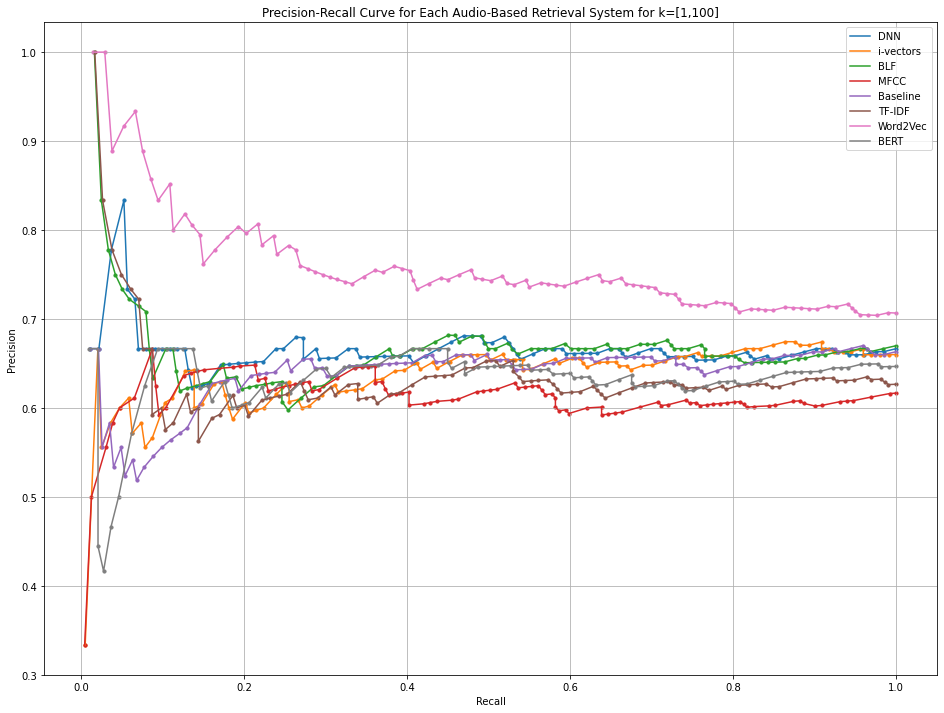

In [11]:
plt.figure(figsize=(16, 12))

for i, pr_values in enumerate(system_average_pr):
    precisions = [pr_values[k][0] for k in range(1, 101)]
    recalls = [pr_values[k][1] for k in range(1, 101)]
    plt.plot(recalls, precisions, label=systems_legend[i])
    plt.scatter(recalls, precisions, s=10)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Audio-Based Retrieval System for k=[1,100]')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 8: nDCG10, GenreCoverage and GenreDiversity</p>
    <p> Now we will do the same thing for the nDCG10, GenreCoverage and GenreDiversity, however, we will for now omid the plot. All functions can be found in our utils file.
</p>
</div>

In [12]:
# See utils for the functions please

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Step 9: Final Pipeline</p>
    <p> At the very end, we finally arive at the end of this notebook. Here we implemented a pipeline,which takes into account all previous steps we have done so far into one simple cell.
</p>
</div>

In [14]:
k = 10

zipped_systems = zip(systems_legend, systems_data)
results = []

for name, data in zipped_systems:
    
    precision_at_k = helper.calculate_average_precision_at_k(data, k)
    recall_at_k = helper.calculate_average_recall_at_k(data, full_dataset, query_genres, k)
    ndcg = helper.calculate_average_nDCG_at_10(data, full_dataset, query_genres)
    gen_cov = helper.calculate_genre_coverage_at_10(data)
    gen_div = helper.calculate_genre_diversity_at_10(data)
    results.append((name, precision_at_k, recall_at_k, ndcg, gen_cov, gen_div))

results_df = pd.DataFrame(results, columns=['System Name', 'Precision@10', 'Relevance@10', "NDCG@10", "Genre Coverage@10", "Genre Diversity@10"])

# Display the results
display(results_df)


,System Name,Precision@10,Relevance@10,NDCG@10,Genre Coverage@10,Genre Diversity@10
0,DNN,0.666667,0.001003,0.090172,0.339806,4.312636
1,i-vectors,0.566667,0.000867,0.072280,0.268571,4.255011
2,BLF,0.633333,0.000901,0.066875,0.330275,4.258109
3,MFCC,0.600000,0.000874,0.057299,0.327381,4.021104
4,Baseline,0.533333,0.000765,0.076140,0.245989,4.245410
5,TF-IDF,0.600000,0.000931,0.095432,0.311798,4.253612
6,Word2Vec,0.800000,0.001204,0.096054,0.294461,4.270663
7,BERT,0.666667,0.001022,0.089620,0.279778,4.312632
